In [78]:
import pandas as pd

In [79]:
df = pd.read_csv('apartments_cleaned.csv')

In [80]:
df

,room_count,bathroom_count,size,price,city,region
0,2.0,2.0,113.0,170.0,Ariana,Ariana Ville
1,3.0,2.0,138.0,340.0,Ariana,Jardins D'el Menzah
2,2.0,1.0,80.0,230.0,Ariana,Ennasr
3,4.0,2.0,200.0,440.0,Ariana,Ennasr
4,4.0,1.0,160.0,310.0,Ariana,Autres villes
...,...,...,...,...,...,...
946,2.0,1.0,98.0,299.0,Tunis,Le Kram
947,3.0,2.0,161.0,415.0,Tunis,Sidi Daoud
948,3.0,1.0,104.0,160.0,Tunis,Hraïria
949,2.0,1.0,68.0,110.0,Tunis,Centre Urbain Nord


In [81]:
df['price'] = df['price'] * 1.25

In [82]:
df_merged.to_csv('merged.csv', index=False)
print("Merged data saved to 'merged.csv'")

Merged data saved to 'merged.csv'


In [83]:
df

,room_count,bathroom_count,size,price,city,region
0,2.0,2.0,113.0,212.50,Ariana,Ariana Ville
1,3.0,2.0,138.0,425.00,Ariana,Jardins D'el Menzah
2,2.0,1.0,80.0,287.50,Ariana,Ennasr
3,4.0,2.0,200.0,550.00,Ariana,Ennasr
4,4.0,1.0,160.0,387.50,Ariana,Autres villes
...,...,...,...,...,...,...
946,2.0,1.0,98.0,373.75,Tunis,Le Kram
947,3.0,2.0,161.0,518.75,Tunis,Sidi Daoud
948,3.0,1.0,104.0,200.00,Tunis,Hraïria
949,2.0,1.0,68.0,137.50,Tunis,Centre Urbain Nord


In [84]:
df2 = pd.read_csv('processed_apartment_data.csv')

In [85]:
df2

,room_count,bathroom_count,size,price,city,region
0,1.0,1.0,55.0,184.998,Tunis,L Aouina
1,2.0,0.0,85.0,175.000,Ben Arous,Ezzahra
2,2.0,1.0,98.0,148.000,Ariana,Ghazela
3,3.0,2.0,100.0,330.000,Ben Arous,Mgrine
4,3.0,2.0,170.0,740.000,Tunis,Ain Zaghouan Nord
...,...,...,...,...,...,...
561,1.0,1.0,76.0,180.000,Ariana,Ghazela
562,1.0,1.0,54.0,180.000,Ariana,Ennasr
563,2.0,1.0,100.0,460.000,Tunis,La Marsa
564,3.0,2.0,186.5,450.000,Tunis,El Menzah 9


In [86]:
common_cols = [col for col in df.columns if col in df2.columns and col != 'region']
duplicates_df = pd.merge(df, df2, on=common_cols, how='inner')
num_duplicates = len(duplicates_df)
print(f"Number of duplicate rows (excluding 'region') between df and df2: {num_duplicates}")

Number of duplicate rows (excluding 'region') between df and df2: 4


In [87]:
duplicates_df

,room_count,bathroom_count,size,price,city,region_x,region_y
0,2.0,1.0,80.0,150.0,Ariana,Autres villes,Ariana Ville
1,2.0,1.0,80.0,150.0,Ariana,Borj Louzir,Ariana Ville
2,2.0,1.0,80.0,150.0,Ariana,Ariana Ville,Ariana Ville
3,1.0,1.0,65.0,200.0,Tunis,La Marsa,L Aouina


In [88]:
df_filtered = df[~df.set_index(common_cols).index.isin(duplicates_df.set_index(common_cols).index)]
df_merged = pd.concat([df_filtered, df2], ignore_index=True)
print(f"Original df shape: {df.shape}")
print(f"Filtered df shape: {df_filtered.shape}")
print(f"Merged df shape: {df_merged.shape}")
display(df_merged.head())

Original df shape: (951, 6)
Filtered df shape: (947, 6)
Merged df shape: (1513, 6)


,room_count,bathroom_count,size,price,city,region
0,2.0,2.0,113.0,212.5,Ariana,Ariana Ville
1,3.0,2.0,138.0,425.0,Ariana,Jardins D'el Menzah
2,2.0,1.0,80.0,287.5,Ariana,Ennasr
3,4.0,2.0,200.0,550.0,Ariana,Ennasr
4,4.0,1.0,160.0,387.5,Ariana,Autres villes


In [89]:
df_merged

,room_count,bathroom_count,size,price,city,region
0,2.0,2.0,113.0,212.5,Ariana,Ariana Ville
1,3.0,2.0,138.0,425.0,Ariana,Jardins D'el Menzah
2,2.0,1.0,80.0,287.5,Ariana,Ennasr
3,4.0,2.0,200.0,550.0,Ariana,Ennasr
4,4.0,1.0,160.0,387.5,Ariana,Autres villes
...,...,...,...,...,...,...
1508,1.0,1.0,76.0,180.0,Ariana,Ghazela
1509,1.0,1.0,54.0,180.0,Ariana,Ennasr
1510,2.0,1.0,100.0,460.0,Tunis,La Marsa
1511,3.0,2.0,186.5,450.0,Tunis,El Menzah 9


## Explore Merged Data

### Subtask:
Display the first few rows, data types, and summary statistics of the `df_merged` DataFrame to get an initial understanding of its structure and content.


**Reasoning**:
To get an initial understanding of the `df_merged` DataFrame, I will display its first few rows, data types and non-null counts, and summary statistics in one go.



In [90]:
print("First 5 rows of df_merged:")
display(df_merged.head())

print("\nDataFrame Info (data types and non-null counts):")
df_merged.info()

print("\nSummary Statistics:")
display(df_merged.describe())

First 5 rows of df_merged:


,room_count,bathroom_count,size,price,city,region
0,2.0,2.0,113.0,212.5,Ariana,Ariana Ville
1,3.0,2.0,138.0,425.0,Ariana,Jardins D'el Menzah
2,2.0,1.0,80.0,287.5,Ariana,Ennasr
3,4.0,2.0,200.0,550.0,Ariana,Ennasr
4,4.0,1.0,160.0,387.5,Ariana,Autres villes



DataFrame Info (data types and non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   room_count      1513 non-null   float64
 1   bathroom_count  1513 non-null   float64
 2   size            1513 non-null   float64
 3   price           1513 non-null   float64
 4   city            1513 non-null   object 
 5   region          1513 non-null   object 
dtypes: float64(4), object(2)
memory usage: 71.1+ KB

Summary Statistics:


,room_count,bathroom_count,size,price
count,1513.000000,1513.000000,1513.000000,1513.000000
mean,2.553866,1.454726,122.744019,328.901556
std,0.914991,0.683879,53.120293,206.964074
min,1.000000,0.000000,30.000000,47.000000
25%,2.000000,1.000000,87.000000,190.000000
50%,3.000000,1.000000,115.000000,280.000000
75%,3.000000,2.000000,145.000000,410.000000
max,8.000000,4.000000,500.000000,1875.000000


## Analyze Numerical Distributions

### Subtask:
Generate histograms and box plots for numerical columns such as 'price', 'size', 'room_count', and 'bathroom_count' to visualize their distributions and identify any outliers. The plots should be placed next to each other for easy comparison and should include legends where appropriate.


**Reasoning**:
To visualize the distributions and identify outliers in the numerical columns, I will generate histograms and box plots for each specified column, placing them side-by-side for easy comparison, as requested in the subtask.



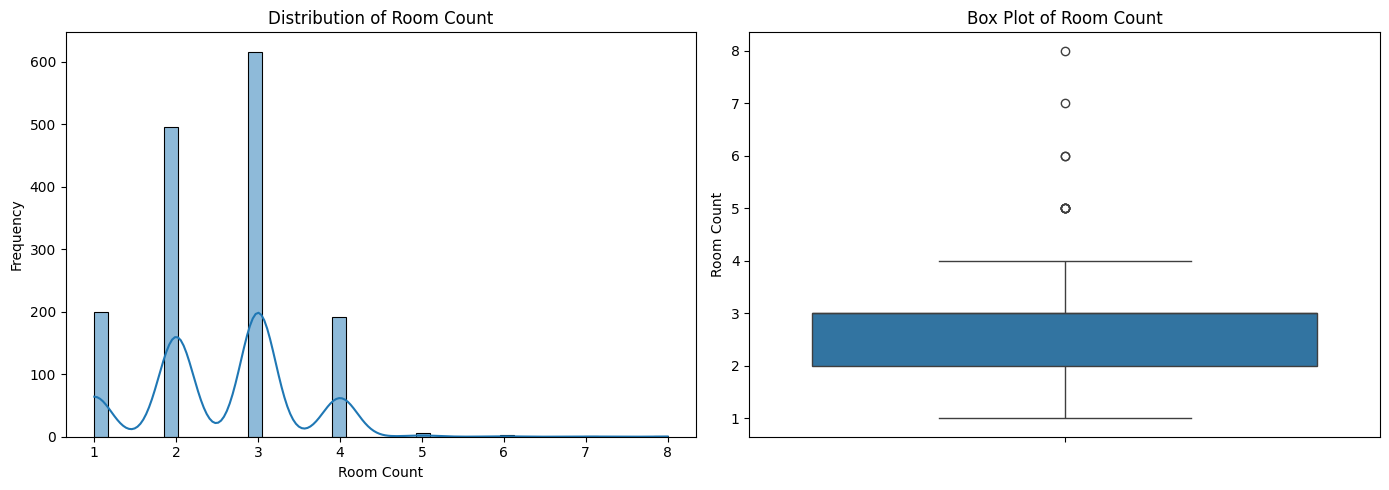

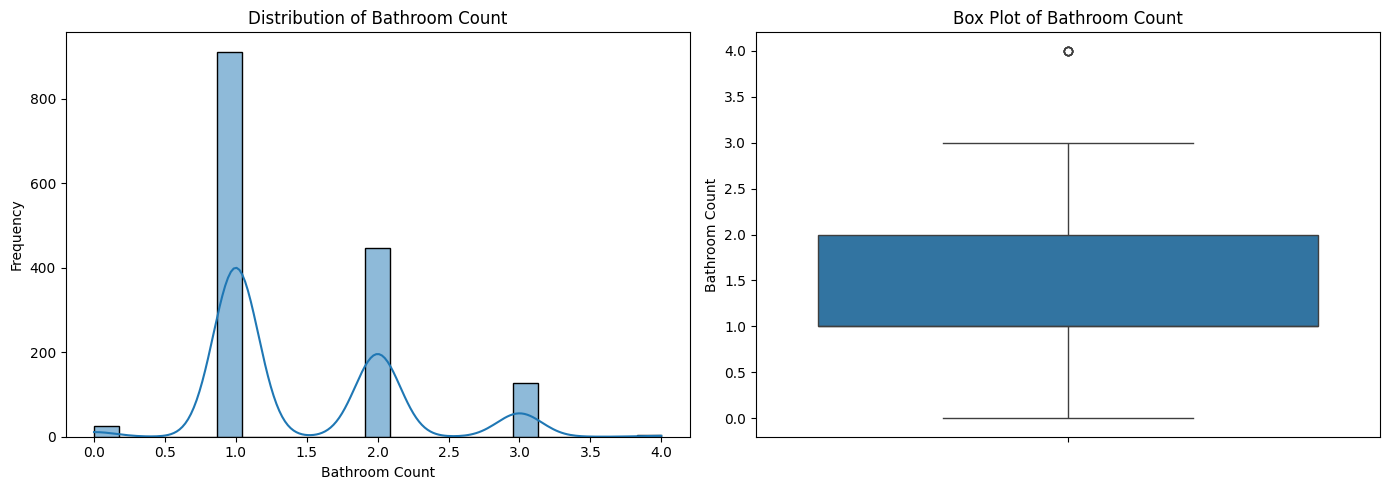

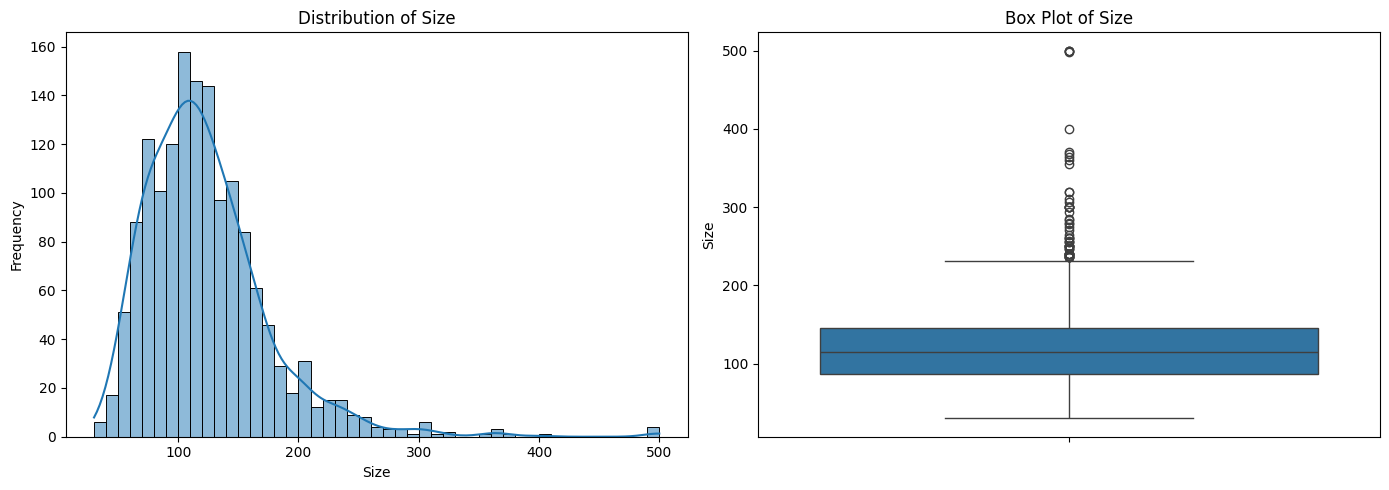

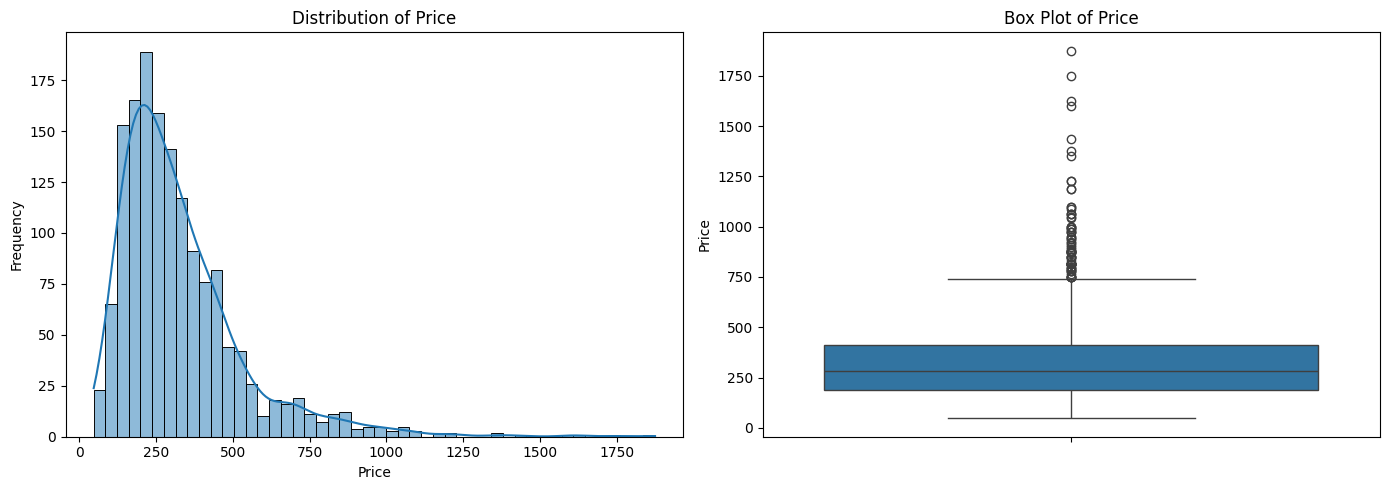

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to analyze
numerical_cols = ['room_count', 'bathroom_count', 'size', 'price']

for col in numerical_cols:
    plt.figure(figsize=(14, 5))

    # Histogram subplot
    plt.subplot(1, 2, 1)
    sns.histplot(df_merged[col], kde=True)
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Frequency')

    # Box plot subplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_merged[col])
    plt.title(f'Box Plot of {col.replace("_", " ").title()}')
    plt.ylabel(col.replace("_", " ").title())

    plt.tight_layout()
    plt.show()

## Investigate Price Relationships

### Subtask:
Create scatter plots to visualize the relationship between 'price' and 'size', and 'price' and 'room_count'. Also, generate box plots to show the distribution of 'price' across different 'city' and 'region' categories. All plots should be displayed next to each other where applicable and include appropriate legends.


**Reasoning**:
To visualize the relationships between 'price' and 'size', 'price' and 'room_count', and the distribution of 'price' across 'city' and 'region', I will generate the requested scatter plots and box plots using `seaborn` and `matplotlib.pyplot` as specified in the instructions. This will provide insights into the factors influencing apartment prices.



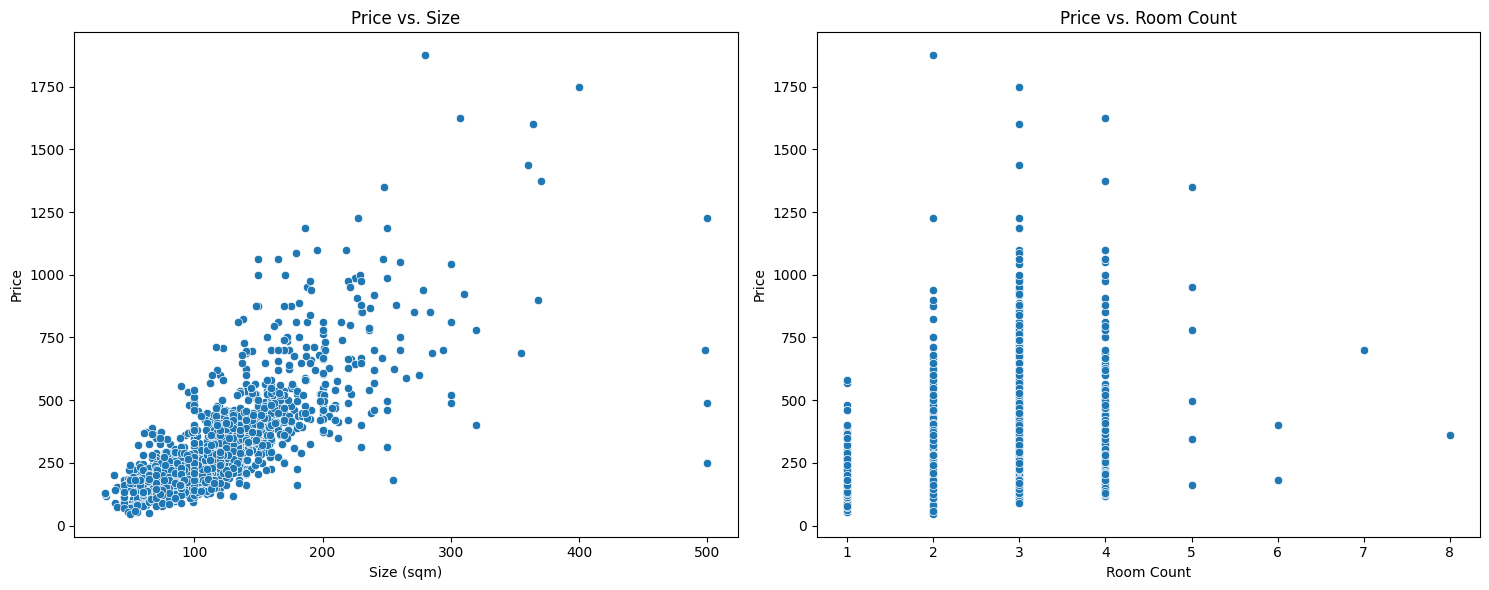

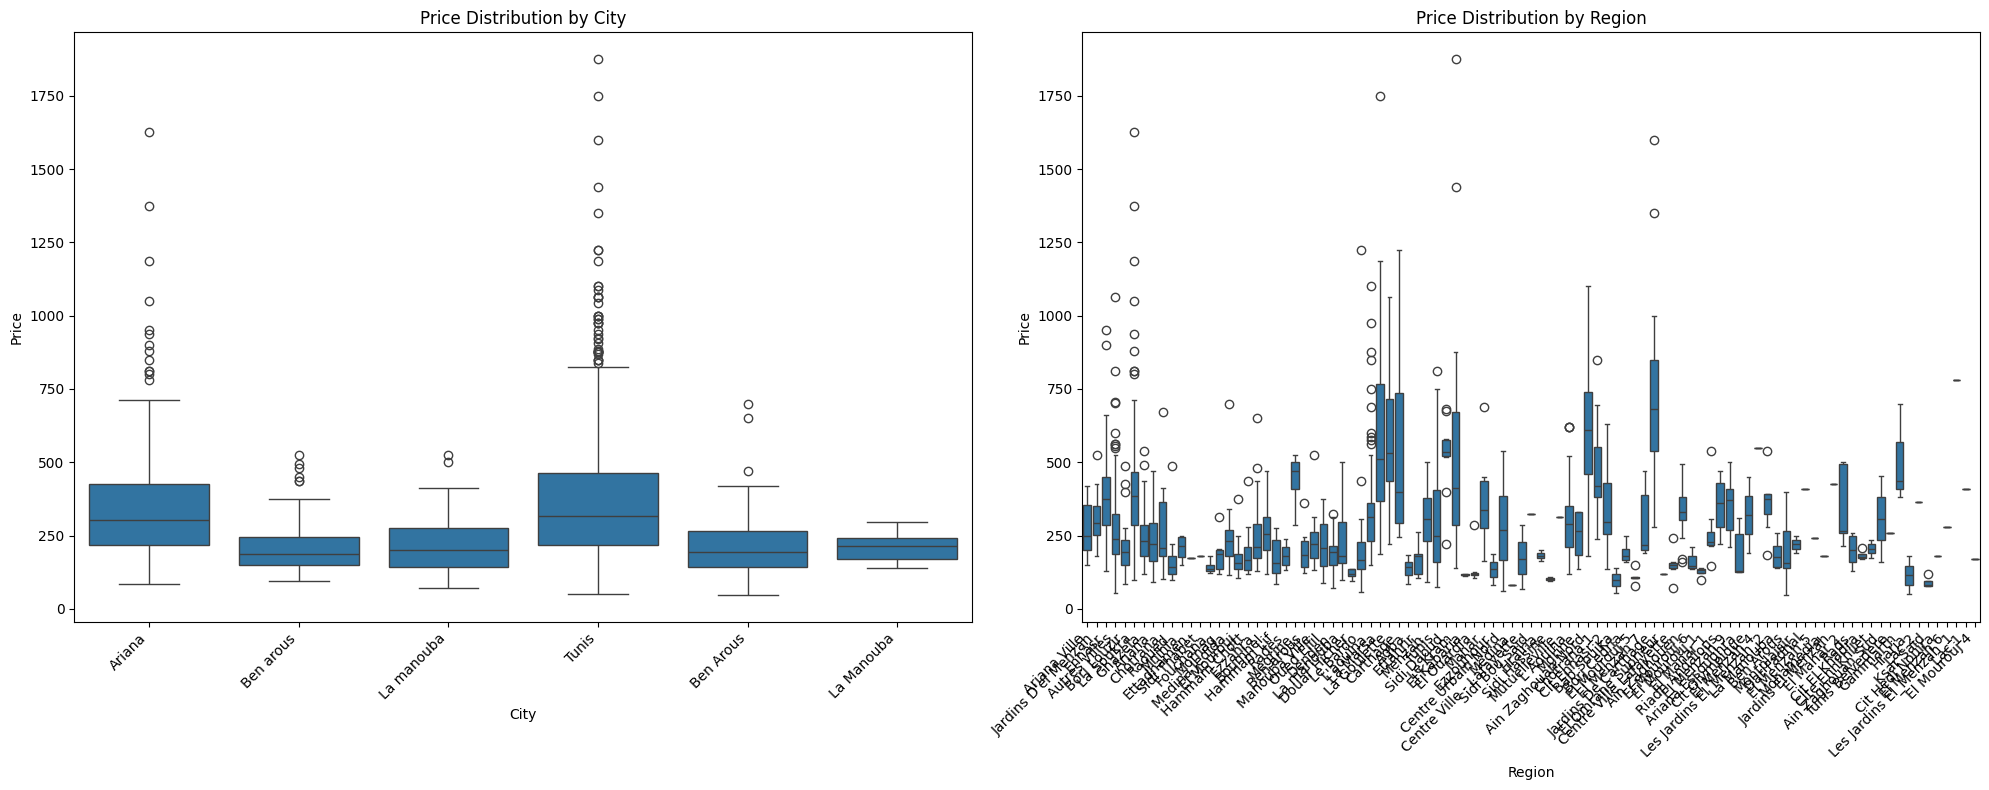

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter plots for 'price' vs 'size' and 'price' vs 'room_count'
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='size', y='price', data=df_merged)
plt.title('Price vs. Size')
plt.xlabel('Size (sqm)')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
sns.scatterplot(x='room_count', y='price', data=df_merged)
plt.title('Price vs. Room Count')
plt.xlabel('Room Count')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

# 2. Box plots for 'price' across 'city' and 'region'
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.boxplot(x='city', y='price', data=df_merged)
plt.title('Price Distribution by City')
plt.xlabel('City')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
sns.boxplot(x='region', y='price', data=df_merged)
plt.title('Price Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Calculate Key Metrics

### Subtask:
Compute key metrics such as mean, median, standard deviation, min, and max for the 'price', 'size', 'room_count', and 'bathroom_count' columns. Also, count unique values for 'city' and 'region'.


**Reasoning**:
To compute key metrics for the specified numerical columns and count unique values for the categorical columns, I will first select the relevant numerical columns and use the `describe()` method to get mean, std, min, and max, and then explicitly calculate the median. For categorical columns, I will use `nunique()`.



In [93]:
numerical_cols = ['price', 'size', 'room_count', 'bathroom_count']
print("Key Metrics for Numerical Columns:")
display(df_merged[numerical_cols].agg(['mean', 'median', 'std', 'min', 'max']))

categorical_cols = ['city', 'region']
print("\nUnique Value Counts for Categorical Columns:")
for col in categorical_cols:
    unique_count = df_merged[col].nunique()
    print(f"Number of unique {col.replace('_', ' ').title()}s: {unique_count}")

Key Metrics for Numerical Columns:


,price,size,room_count,bathroom_count
mean,328.901556,122.744019,2.553866,1.454726
median,280.000000,115.000000,3.000000,1.000000
std,206.964074,53.120293,0.914991,0.683879
min,47.000000,30.000000,1.000000,0.000000
max,1875.000000,500.000000,8.000000,4.000000



Unique Value Counts for Categorical Columns:
Number of unique Citys: 6
Number of unique Regions: 95
